# Accident-Eye: CNN model

---


## Loading and Preprocessing Image Data for Classification


### 1. Load the Train set

In [ ]:
import os
import cv2
import numpy as np

# Create lists to store image data and labels
data = []
labels = []

# Define classes (folder names)
classes = ['NonAccident', '3', '1', '2']

# Iterate through each class (folder)
for class_name in classes:
    class_path = os.path.join('/ds/train', class_name)
    # Iterate through each image file in the class folder
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(class_path, filename))
            # Resize the image to a 320x320 pixels
            img = cv2.resize(img, (320, 320))
            data.append(img)
            # Append the corresponding label
            labels.append(classes.index(class_name))

# Convert the lists to NumPy arrays for further processing
data = np.array(data)
labels = np.array(labels)


### 2. Load test set

In [ ]:
import os
import cv2
import numpy as np

# Create lists to store image data and labels
dataVal = []
labelsVal = []

# Define classes (folder names)
classes = ['NonAccident', '3', '1', '2']

# Iterate through each class (folder)
for class_name in classes:
    class_path = os.path.join('/ds/test', class_name)
    # Iterate through each image file in the class folder
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(class_path, filename))
            # Resize the image to a 320x320 pixels
            img = cv2.resize(img, (320, 320))
            dataVal.append(img)
            # Append the corresponding label
            labelsVal.append(classes.index(class_name))

# Convert the lists to NumPy arrays for further processing
dataVal = np.array(dataVal)
labelsVal = np.array(labelsVal)


### 3. Normalization and label One-Hot Encoding

In [ ]:
from keras.utils import to_categorical

# Normalize pixel values
X_train = data.astype('float32') / 255.0
X_test = dataVal.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(labels, num_classes=len(classes))
y_test = to_categorical(labelsVal, num_classes=len(classes))




## Designing and Training a Convolutional Neural Network (CNN)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Function to create a CNN model
def create_cnn_model():
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(320, 320, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.0))

    # Second convolutional layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    # Third convolutional layer
    model.add(layers.Conv2D(264, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Fourth convolutional layer
    model.add(layers.Conv2D(512, (5, 5), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    # Global average pooling
    model.add(layers.GlobalAveragePooling2D())


    # Flatten the output and add a fully connected layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.0))
    model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes for classification

    return model

# Create the model
cnn_model = create_cnn_model()

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Learning rate scheduler to adjust learning rate dynamically based on validation loss
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train the model with 100 epochs
history = cnn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler]
)

2025-01-09 22:44:28.857669: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43629 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9
2025-01-09 22:44:31.789667: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16590028800 exceeds 10% of free system memory.
2025-01-09 22:44:41.904916: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16590028800 exceeds 10% of free system memory.


Epoch 1/100


2025-01-09 22:44:50.613213: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-01-09 22:44:50.886777: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2025-01-09 22:44:52.790550: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efe39e93910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-09 22:44:52.790583: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2025-01-09 22:44:52.811187: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736462692.960450    4001 device_compiler.h:186] Compiled cluster using XLA!  This l

422/422 [==============================] - 68s 140ms/step - loss: 1.0219 - accuracy: 0.5708 - val_loss: 2.4349 - val_accuracy: 0.2775 - lr: 0.0010
Epoch 2/100
422/422 [==============================] - 50s 119ms/step - loss: 0.6700 - accuracy: 0.7287 - val_loss: 1.4826 - val_accuracy: 0.5363 - lr: 0.0010
Epoch 3/100
422/422 [==============================] - 50s 119ms/step - loss: 0.5507 - accuracy: 0.7749 - val_loss: 1.4539 - val_accuracy: 0.4815 - lr: 0.0010
Epoch 4/100
422/422 [==============================] - 51s 120ms/step - loss: 0.4792 - accuracy: 0.8028 - val_loss: 2.3923 - val_accuracy: 0.4021 - lr: 0.0010
Epoch 5/100
422/422 [==============================] - 50s 120ms/step - loss: 0.4346 - accuracy: 0.8184 - val_loss: 1.0198 - val_accuracy: 0.6082 - lr: 0.0010
Epoch 6/100
422/422 [==============================] - 50s 120ms/step - loss: 0.3862 - accuracy: 0.8419 - val_loss: 0.5373 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 7/100
422/422 [==============================] - 50s

### Save the model and the training history

In [ ]:
import pandas as pd
from keras.models import load_model

# Save the training history
history = history.history
df = pd.DataFrame(history)
df.to_csv('model_history_320_32.csv', index=False)

print("Training history saved to model_history_320_32.csv")


# Saves the trained model
cnn_model.save('cnn_model_320_32.h5')


Training history saved to model_history_320_32.csv


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualizing Model Performance: Accuracy and Loss


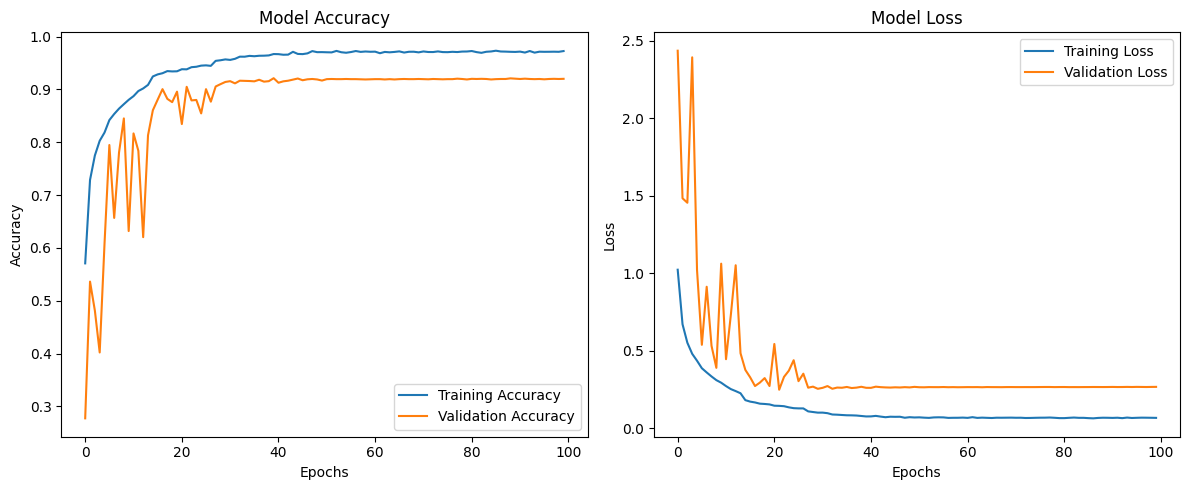

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_accuracy_and_loss(history)


## Evaluating Model Performance: Confusion Matrix


106/106 [==============================] - 3s 26ms/step


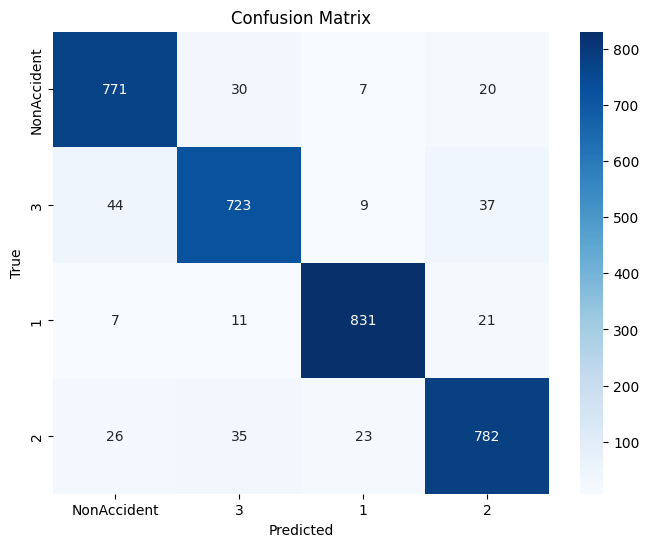

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Class names for the confusion matrix
classes = ['NonAccident', '3', '1', '2']

# Predict the labels for the test data
y_pred = cnn_model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)
